In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import math

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("./"))

# Any results you write to the current directory are saved as output.

['tensorflow_lstm_airlinePassengers.ipynb', 'airline-passengers.csv', 'pytorch_LSTM_airlinePassengers.ipynb', '.ipynb_checkpoints', 'tensorflow_2017commodityPrice.ipynb', 'pytorch_LSTM_POSTagging.ipynb', '.git', '2017commodityPrice.csv']


In [3]:
# Importing the training set
data = pd.read_csv('./2017commodityPrice.csv',skipfooter=2)
data.head()

/var/folders/58/hxkrgjd16yzcg36mh4h_qrjh0000gn/T/ipykernel_27811/1424940908.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  data = pd.read_csv('./2017commodityPrice.csv',skipfooter=2)


,Unnamed: 0,SETTLEMENTDATE,TOTALDEMAND,RRP
0,0,2017/01/01 00:30:00,6462.14,186.25
1,1,2017/01/01 01:00:00,6352.82,83.75
2,2,2017/01/01 01:30:00,6261.02,64.91
3,3,2017/01/01 02:00:00,6169.66,53.33
4,4,2017/01/01 02:30:00,6149.87,64.03


In [9]:
dataset

array([186.25,  83.75,  64.91, ...,  91.26, 100.71,  97.68])

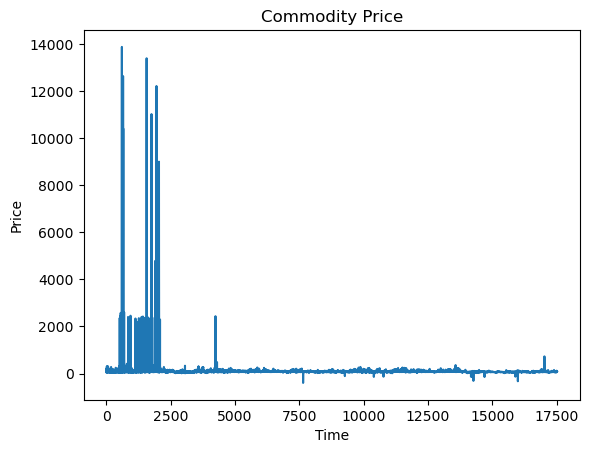

In [8]:

dataset = data.iloc[:, 3].values
plt.plot(dataset)
plt.xlabel("Time")
plt.ylabel("Price")
plt.title("Commodity Price")
plt.show()

In [10]:
data[data['RRP']>=2000]

,Unnamed: 0,SETTLEMENTDATE,TOTALDEMAND,RRP
525,525,2017/01/11 23:00:00,6876.26,2361.08
553,553,2017/01/12 13:00:00,8225.73,2367.55
558,558,2017/01/12 15:30:00,8912.59,2458.29
559,559,2017/01/12 16:00:00,8933.12,2428.97
560,560,2017/01/12 16:30:00,8920.60,2363.11
...,...,...,...,...
2052,564,2017/02/12 18:30:00,9228.58,2259.16
2053,565,2017/02/12 19:00:00,9232.71,4551.58
2054,566,2017/02/12 19:30:00,9232.51,2261.72
2091,603,2017/02/13 14:00:00,9156.70,2296.01


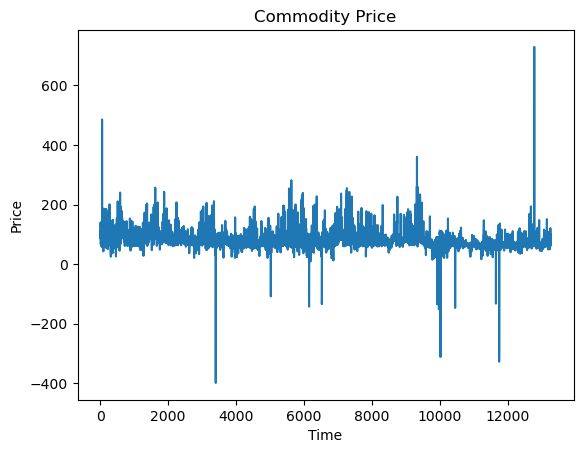

In [11]:
dataset = data.iloc[4246:, 3].values
plt.plot(dataset)
plt.xlabel("Time")
plt.ylabel("Price")
plt.title("Commodity Price")
plt.show()

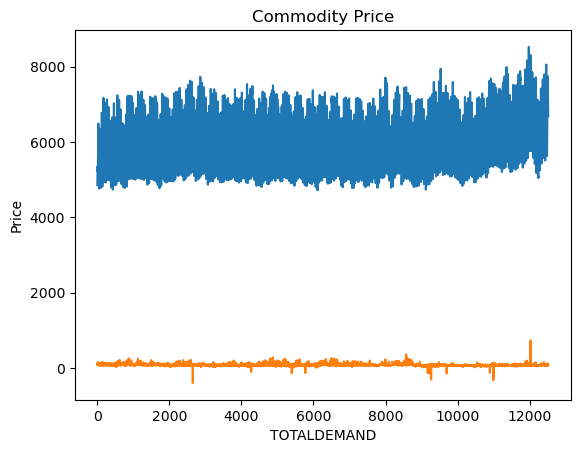

In [14]:
dataset = data.iloc[5000:, [2,3]].values
plt.plot(dataset)
plt.xlabel("TOTALDEMAND")
plt.ylabel("Price")
plt.title("Commodity Price")
plt.show()

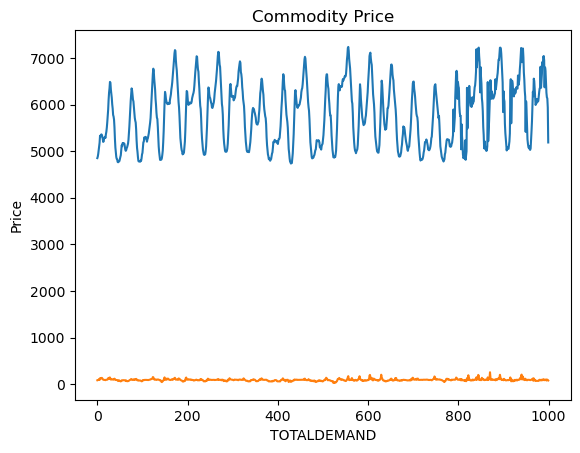

In [15]:
dataset = data.iloc[5000:6000, [2,3]].values
plt.plot(dataset)
plt.xlabel("TOTALDEMAND")
plt.ylabel("Price")
plt.title("Commodity Price")
plt.show()